# Part 2 : Visualization

Firstly, we will import different packages in order to do this visualisation parts.

In [1]:
pip install geopandas

In [62]:
import geopandas as gpd
import folium
from shapely.geometry import Point
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Map

We are here going to respresent the different places of the attractions on the Belgium map. We will first import the excel file and use the useful columns in order to do that.

In [63]:
df = pd.read_excel("webscraping.xlsx", usecols=["Latitude", "Longitude", "Adults", "Children"])
df.head()

,Adults,Children,Latitude,Longitude
0,0.0,0.0,47.378864,-0.607726
1,5.0,1.0,50.333228,4.351559
2,13.0,8.0,50.712304,3.830113
3,7.0,5.0,50.645094,5.573611
4,4.0,2.0,50.454957,3.951958


After that, we can create a map of belgium with the different attractions on it. We will here put a marker on each attractions present in Wallonia and Brussels. We will also restrict the longitude and the latitude to the one of belgium in order to have only the one present in Belgium. This has been put in place because of certain errors of location of attractions in the longitude and latitude columns.

In [64]:
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

for lat, lon in zip(belgium_df['Latitude'], belgium_df['Longitude']):
    folium.Marker(location=[lat, lon]).add_to(belgium_map)

belgium_map

Then, we will make a Heatmap in order to better visualize the density of attractions at certain places.

In [65]:
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

data = belgium_df[['Latitude', 'Longitude']].values.tolist()
heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})
heatmap_layer.add_to(belgium_map)

belgium_map

C:\Users\flori\AppData\Local\Temp\ipykernel_3436\1997167464.py:6: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})


We can observe on the Heatmap the different density of attractions in Wallonia and Brussels. We observe also that the highest density of attractions is located in Brussels. We also notices that cities, like Liege or Mons, have a high density of attractions. We can also see that in the province of Luxembourg, there are less attractions than in other provinces. It could be caused by the fact that there are less big cities in this province. We could conclude that attractions are often near a big cities than in the middle of small villages.

## Bar Chart

**See how many activities there are for the 20 cities with the most activities**

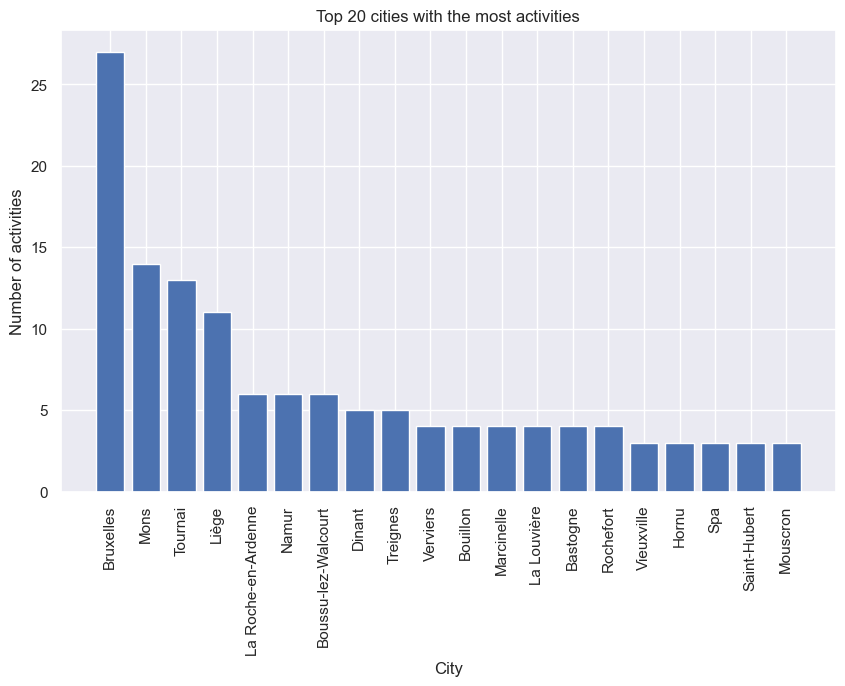

In [67]:
df = pd.read_excel('webscraping.xlsx')
top_cities = df.groupby('City').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of activities')
plt.title('Top 20 cities with the most activities')
plt.show()

This graph gives us also another interpretation to the location of the different attractions in Wallonia and Brussels. It shows that Brussels is the city with the most attractions. Followed after by Mons, Tournai and Liège.

If we take a look now to the prices for adults and children, we can make a bar graph with the distribution of prices for the two categories.

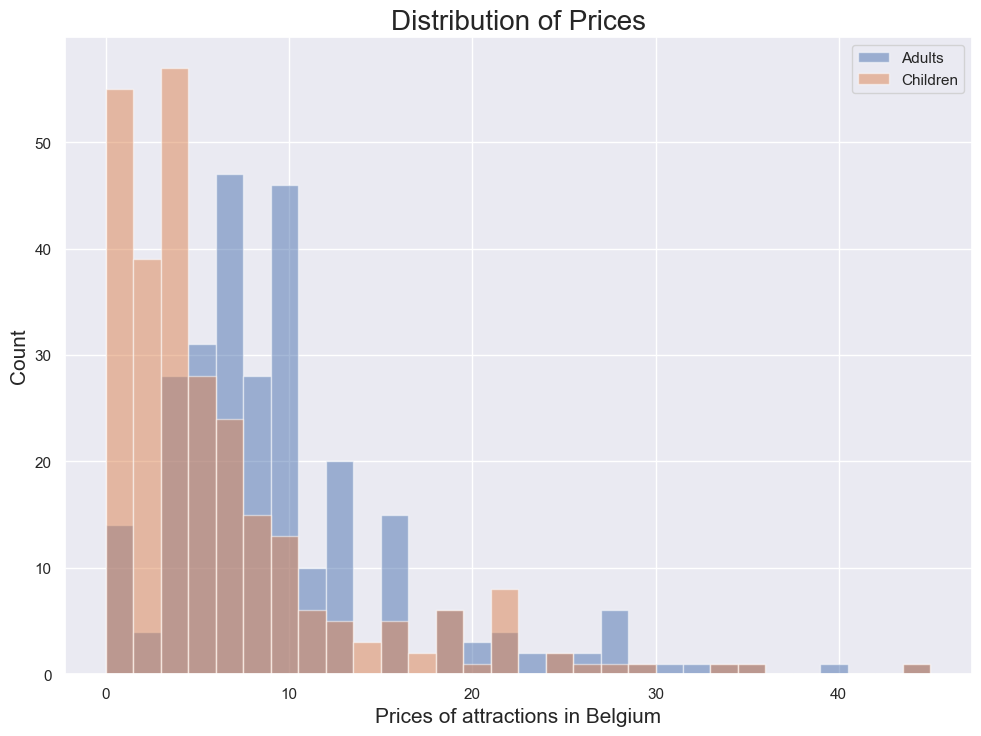

In [68]:
plt.hist(df['Adults'], bins=30, alpha=0.5, label='Adults')

plt.hist(df['Children'], bins=30, alpha=0.5, label='Children')

plt.xlabel("Prices of attractions in Belgium", size=15)
plt.ylabel('Count', size=15)
plt.title('Distribution of Prices', size=20)

plt.legend()
plt.show()

When we look at the graph above, we can observe that the prices for the children are very often under the prices of the adults. In addition to that we can see that the children prices are lower than the adults prices in the first 10 euros.

## Box plot

**Show the distribution of adult prices for each activity type**

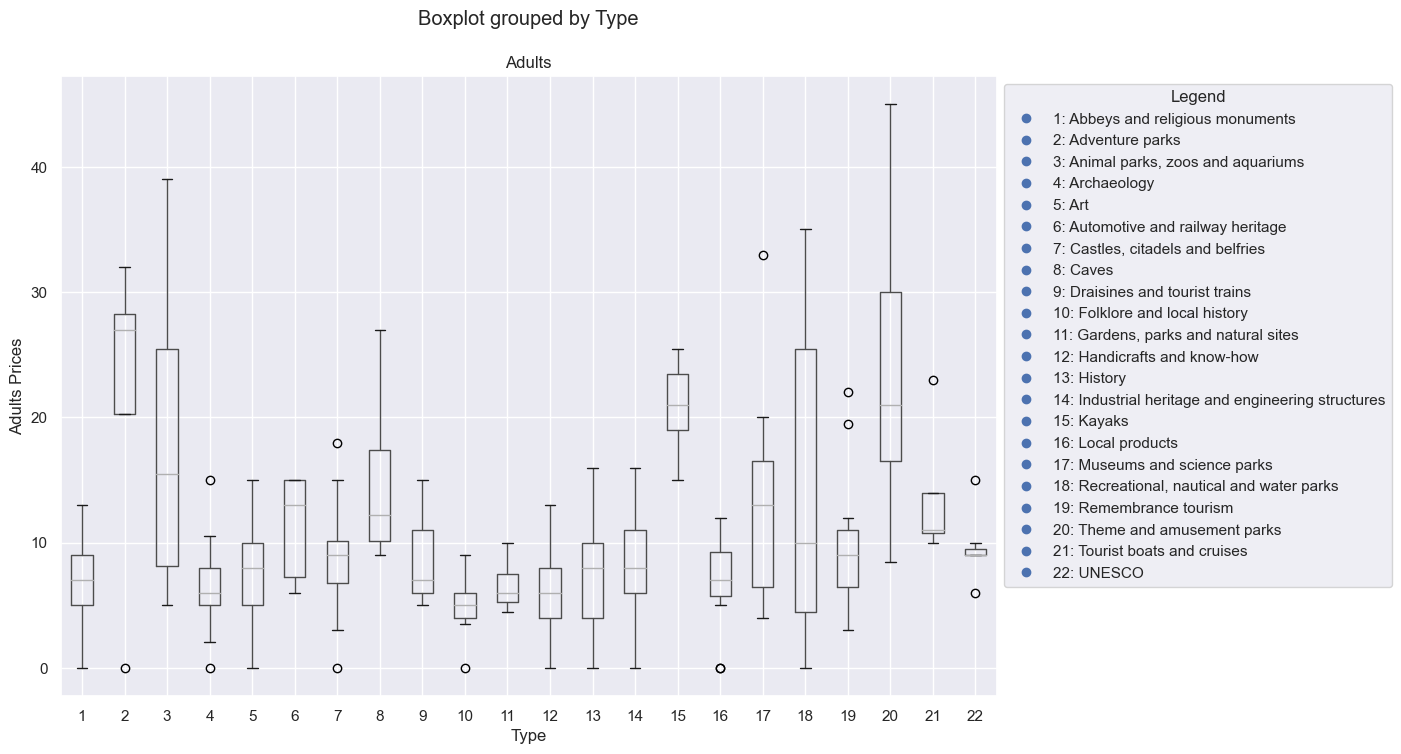

In [69]:
df = df.dropna()

array1 = df['Adults']
array2 = df['Children']

result = array1 / array2

activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

df['Type'] = df['Type'].replace(activity_type_dict)

ax = df.boxplot(column='Adults', by='Type')

labels = {'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22}
ax.set_xticklabels(labels.values())

plt.ylabel('Adults Prices')

legend_entries = [plt.Line2D([], [], marker='o', linestyle='', label=f'{v}: {k}') for k, v in activity_type_dict.items()]
plt.legend(handles=legend_entries, title='Activity Type')
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')

plt.show()

The box plot shows the median price (the line inside the box), the interquartile range (the box), the whiskers (the lines extending from the box that indicate the range of values outside the box), and any outliers (represented as individual points) for each type of activity. The price with the highest mean is the type "Adventure parks" and the type with the smallest mean is the "Folklore and local history". 

**Show the distribution of children prices for each activity type**

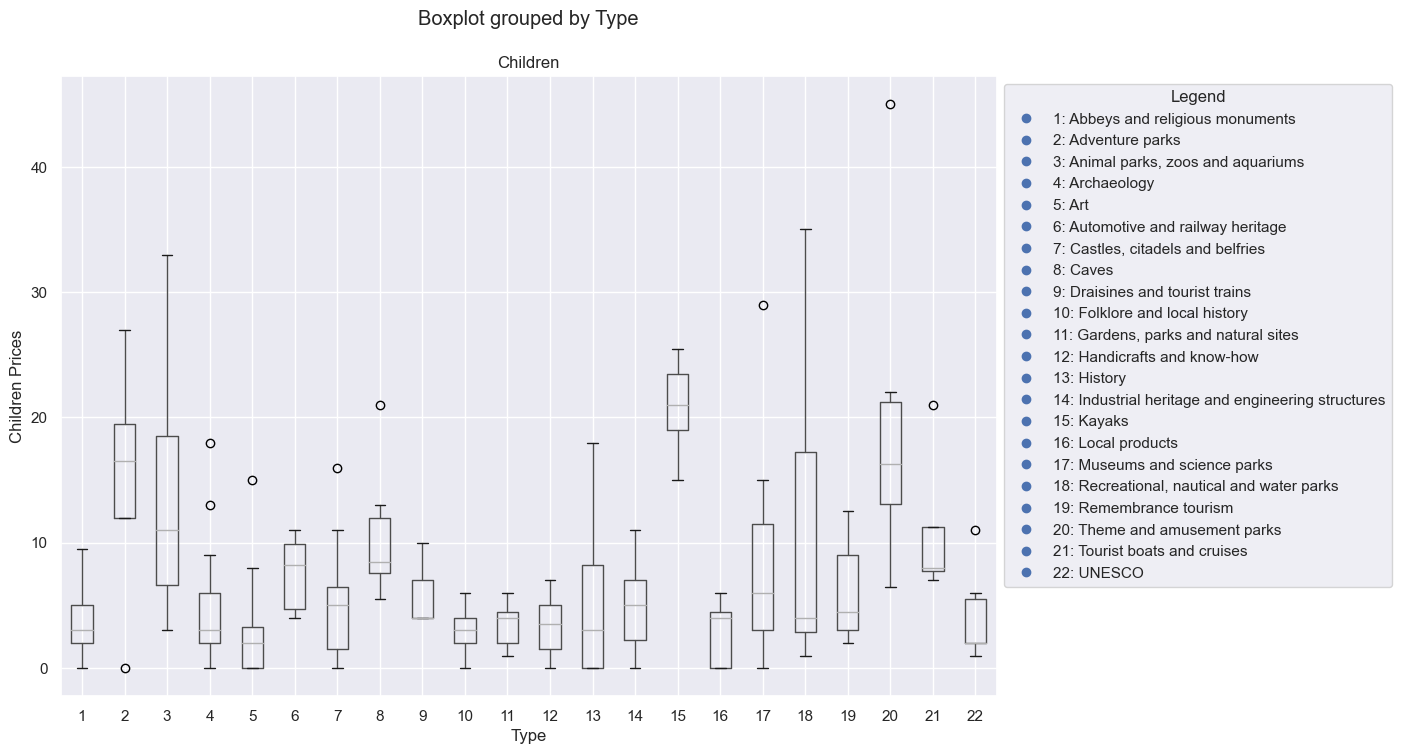

In [70]:
df = pd.read_excel('webscraping.xlsx')
df = df.dropna()

array1 = df['Adults']
array2 = df['Children']

result = array1 / array2

activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

df['Type'] = df['Type'].replace(activity_type_dict)

ax = df.boxplot(column='Children', by='Type')

labels = {'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22}
ax.set_xticklabels(labels.values())

plt.ylabel('Children Prices')

legend_entries = [plt.Line2D([], [], marker='o', linestyle='', label=f'{v}: {k}') for k, v in activity_type_dict.items()]
plt.legend(handles=legend_entries, title='Activity Type')
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')

plt.show()

First, comparing to the adults prices, we can see that the means here are lower than before, so we can say that globally the child prices are lower than the adult prices. This is well expected and logical. Here the type of activities with the lowest mean are  "art" and "UNESCO". The activity with the highest mean is the "Kayaks".

Generally speaking, these two graphs show that children's prices are lower than adults' overall, which was the expected result.

## Pie chart

**Show the percentage of each activity type in the database**

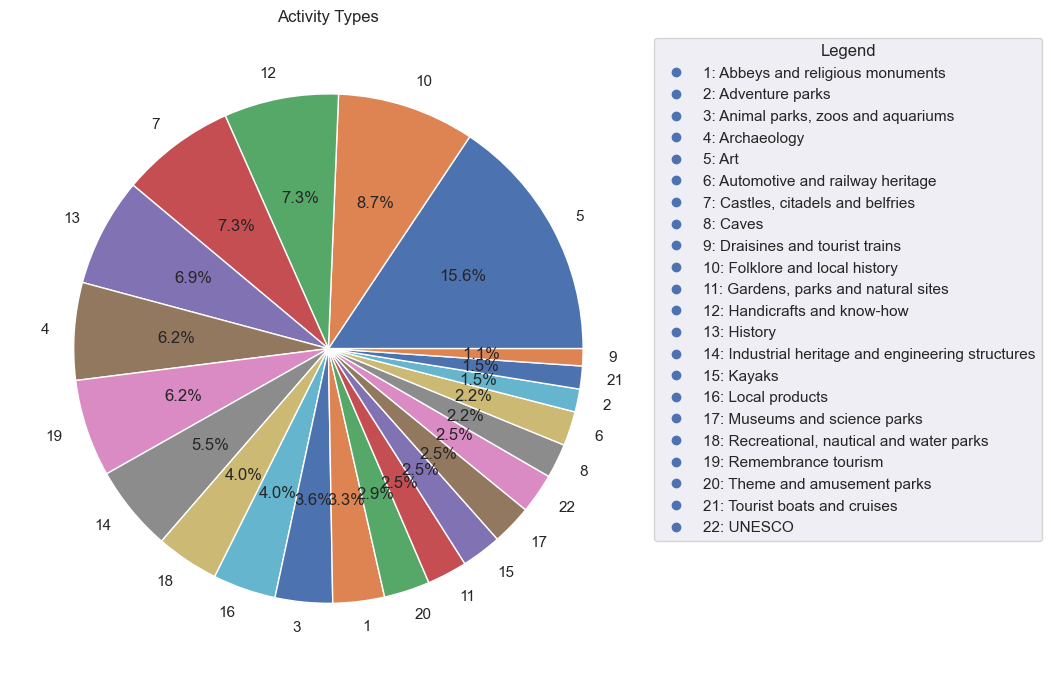

In [71]:
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

activity_counts = df['Type'].value_counts()

activity_types = activity_counts.index
activity_values = activity_counts.values

plt.pie(activity_values, labels=activity_types, autopct='%1.1f%%')

legend_entries = [plt.Line2D([], [], marker='o', linestyle='', label=f'{v}: {k}') for k, v in activity_type_dict.items()]
plt.legend(handles=legend_entries, title='Activity Type')
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')

plt.title('Activity Types')
plt.show()

We can observe that there are a lot of attractions about arts in Wallonia and Brussels. The type Art represented 15.6% of the total activities in this region. It is followed by the attractions related to the Folklore and local history with a part of 8.7% of the total activity in Wallonia and Brussels. This pie chart show that Wallonia and Brussels hav a lot of different attractions related to different themes.